### Import modules and set up dataframes

In [390]:
import warnings

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scipy import stats


In [799]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [391]:
adult_df = pd.read_csv("adult.txt")
covtype_df = pd.read_csv("covtype.txt",names=list(range(0,55)))
letter_df = pd.read_csv("letter-recognition.txt",names=list(range(0,17))) 
#census_df = pd.read_csv("census-income.txt",names=list(range(0,42)))

In [394]:
pred_column = covtype_df[54]
positive_label = pred_column.value_counts().index[0]

# convert prediction data into binary labels
pred_column = np.where(pred_column == positive_label, 1, 0)

covtype_df.drop(columns=[54],inplace=True)

In [395]:
scaler = MinMaxScaler().fit(covtype_df)
covtype_df = pd.DataFrame(scaler.transform(covtype_df),columns=covtype_df.columns)
covtype_df.insert(54,'pred',pred_column,True)
covtype_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,pred
43942,0.668334,0.044444,0.136364,0.699356,0.440568,0.582268,0.834646,0.874016,0.574803,0.314234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
199037,0.646823,0.991667,0.136364,0.257695,0.290698,0.365744,0.811024,0.881890,0.614173,0.216925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
150140,0.594297,0.105556,0.121212,0.000000,0.223514,0.691162,0.866142,0.874016,0.539370,0.103304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
539429,0.577289,0.969444,0.151515,0.042949,0.239018,0.483771,0.795276,0.881890,0.629921,0.118361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
106311,0.561281,0.088889,0.181818,0.360057,0.229974,0.748630,0.854331,0.838583,0.507874,0.221943,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
184331,0.576788,0.141667,0.090909,0.194703,0.286822,0.226640,0.877953,0.893701,0.547244,0.252753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
433602,0.587794,0.036111,0.212121,0.282749,0.254522,0.400169,0.807087,0.822835,0.547244,0.193085,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1428,0.691346,0.086111,0.348485,0.163207,0.290698,0.781369,0.814961,0.720472,0.401575,0.179702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
295630,0.702851,0.144444,0.227273,0.137437,0.271318,0.219053,0.893701,0.811024,0.425197,0.394674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
223497,0.732866,0.733333,0.136364,0.400859,0.279070,0.489673,0.783465,0.960630,0.728346,0.210093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [396]:
letter_col = letter_df[0]
letter_df.drop(columns=[0],inplace=True)

In [397]:
scaler = MinMaxScaler().fit(letter_df)
letter_df_p1 = pd.DataFrame(scaler.transform(letter_df),columns=letter_df.columns)
letter_df_p2 = pd.DataFrame(scaler.transform(letter_df),columns=letter_df.columns)

# two ways to make binary classification labels
letter_df_p1_pred = np.where(letter_col == 'O', 1, 0)
letter_df_p2_pred = np.where(letter_col.isin([chr(x) for x in range(ord('A'), ord('M') + 1)]), 1, 0)
letter_df_p1.insert(16,'pred',letter_df_p1_pred,True)
letter_df_p2.insert(16,'pred',letter_df_p2_pred,True)


letter_df_p1.sample(10, random_state=0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred
19134,0.200000,0.200000,0.266667,0.133333,0.066667,0.266667,0.733333,0.133333,0.466667,0.733333,0.666667,0.333333,0.066667,0.733333,0.133333,0.333333,0
4981,0.200000,0.333333,0.400000,0.266667,0.266667,0.600000,0.400000,0.200000,0.400000,0.666667,0.333333,0.466667,0.133333,0.533333,0.333333,0.600000,0
16643,0.266667,0.533333,0.266667,0.333333,0.133333,0.200000,0.533333,0.533333,0.133333,0.466667,0.333333,0.733333,0.266667,0.533333,0.200000,0.666667,0
19117,0.333333,0.666667,0.466667,0.466667,0.266667,0.266667,0.666667,0.133333,0.533333,0.733333,0.800000,0.600000,0.200000,0.600000,0.133333,0.400000,0
5306,0.266667,0.466667,0.266667,0.533333,0.333333,0.533333,0.466667,0.400000,0.266667,0.533333,0.466667,0.600000,0.200000,0.533333,0.400000,0.533333,0
230,0.466667,0.666667,0.666667,0.533333,0.333333,0.466667,0.533333,0.200000,0.333333,0.666667,0.400000,0.466667,0.466667,0.533333,0.066667,0.533333,0
3148,0.400000,0.666667,0.400000,0.466667,0.466667,0.266667,0.666667,0.133333,0.200000,0.600000,0.533333,0.533333,0.466667,0.733333,0.133333,0.466667,0
11525,0.400000,0.733333,0.400000,0.533333,0.466667,0.333333,0.666667,0.533333,0.200000,0.466667,0.266667,0.533333,0.133333,0.466667,0.333333,0.733333,0
13672,0.333333,0.600000,0.533333,0.533333,0.600000,0.466667,0.533333,0.333333,0.266667,0.533333,0.400000,0.533333,0.466667,0.600000,0.533333,0.533333,0
1624,0.266667,0.333333,0.333333,0.533333,0.133333,0.466667,0.466667,0.266667,0.933333,0.600000,0.400000,0.533333,0.000000,0.533333,0.533333,0.533333,0


In [398]:
letter_df_p2.sample(10, random_state=0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred
19134,0.200000,0.200000,0.266667,0.133333,0.066667,0.266667,0.733333,0.133333,0.466667,0.733333,0.666667,0.333333,0.066667,0.733333,0.133333,0.333333,0
4981,0.200000,0.333333,0.400000,0.266667,0.266667,0.600000,0.400000,0.200000,0.400000,0.666667,0.333333,0.466667,0.133333,0.533333,0.333333,0.600000,1
16643,0.266667,0.533333,0.266667,0.333333,0.133333,0.200000,0.533333,0.533333,0.133333,0.466667,0.333333,0.733333,0.266667,0.533333,0.200000,0.666667,1
19117,0.333333,0.666667,0.466667,0.466667,0.266667,0.266667,0.666667,0.133333,0.533333,0.733333,0.800000,0.600000,0.200000,0.600000,0.133333,0.400000,0
5306,0.266667,0.466667,0.266667,0.533333,0.333333,0.533333,0.466667,0.400000,0.266667,0.533333,0.466667,0.600000,0.200000,0.533333,0.400000,0.533333,0
230,0.466667,0.666667,0.666667,0.533333,0.333333,0.466667,0.533333,0.200000,0.333333,0.666667,0.400000,0.466667,0.466667,0.533333,0.066667,0.533333,0
3148,0.400000,0.666667,0.400000,0.466667,0.466667,0.266667,0.666667,0.133333,0.200000,0.600000,0.533333,0.533333,0.466667,0.733333,0.133333,0.466667,0
11525,0.400000,0.733333,0.400000,0.533333,0.466667,0.333333,0.666667,0.533333,0.200000,0.466667,0.266667,0.533333,0.133333,0.466667,0.333333,0.733333,0
13672,0.333333,0.600000,0.533333,0.533333,0.600000,0.466667,0.533333,0.333333,0.266667,0.533333,0.400000,0.533333,0.466667,0.600000,0.533333,0.533333,1
1624,0.266667,0.333333,0.333333,0.533333,0.133333,0.466667,0.466667,0.266667,0.933333,0.600000,0.400000,0.533333,0.000000,0.533333,0.533333,0.533333,0


<br>

<br>

### Make experiment pipeline 

In [399]:
def run_classifiers(data):
    out = []
    
    iterations = 3
    for i in range(iterations):
        # draw 5k samples for training data, and set aside the rest for testing 
        X_train, Y_train, X_test, Y_test = draw_samples(data)
        # returns the gridsearchCV model list thing
        gridcvs = create_gridsearch()
        
        cvscores = run_gridsearch(gridcvs, X_train, Y_train)
        
        best_algos = best_model_selection(gridcvs, X_train, Y_train)
        
        stats = output_statistics(best_algos, X_train, Y_train, X_test, Y_test)
        
        out.append([gridcvs, cvscores, best_algos, stats])
        
    return out

In [400]:
def draw_samples(data, n = 5000):
    train_index = random.sample(range(0,len(data)), n)
    # assumes target column is last column
    X_train, Y_train = data.iloc[train_index, :-1], data.iloc[train_index, -1]
    
    test = data[~data.index.isin(train_index)]
    X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

    return X_train, Y_train, X_test, Y_test

In [401]:
def create_gridsearch():
    # Initializing Classifiers
    clf1 = LogisticRegression(solver='saga',
                              random_state=0)

    clf2 = KNeighborsClassifier(algorithm='ball_tree',
                                leaf_size=50)
    clf3 = SVC(random_state=0)

    clf4 = RandomForestClassifier(random_state=0)

    clf5 = PassiveAggressiveClassifier(max_iter=5000, random_state=0, tol=1e-3)


    # Building the pipelines
    pipe1 = Pipeline([('classifier', clf1)])

    pipe2 = Pipeline([('classifier', clf2)])

    pipe3 = Pipeline([('classifier', clf3)])

    pipe4 = Pipeline([('classifier', clf4)])

    pipe5 = Pipeline([('classifier', clf5)])



    # Setting up the parameter grids
    param_grid1 = [{'classifier__penalty': ['none', 'l1', 'l2'],
                    'classifier__C': np.logspace(-8, 4, 13)}]

    param_grid2 = [{'classifier__n_neighbors': np.geomspace(1, 500, num=25, dtype=int),
                    'classifier__weights': ['uniform', 'distance']}]

    param_grid3 = [{'classifier__kernel': ['rbf'],
                    'classifier__C': np.power(10., np.arange(-7, 4)),
                    'classifier__gamma': [0.001,0.005,0.01,0.05,0.1,0.5,1,2]},
                   {'classifier__kernel': ['linear'],                
                    'classifier__C': np.power(10., np.arange(-7, 4))},
                   {'classifier__kernel': ['polynomial'],
                    'classifier__degree': [2,3],
                    'classifier__C': np.power(10., np.arange(-7, 4))}]

    param_grid4 = [{'classifier__n_estimators': [1024],
                    'classifier__max_features': [1,2,4,6,8,12,16, 20]}]

    param_grid5 = [{'classifier__C': np.logspace(-8,4,13),
                    'classifier__loss': ['hinge', 'squared_hinge']}]


    # Setting up multiple GridSearchCV objects, 1 for each algorithm
    gridcvs = {}

    for pgrid, est, name in zip((param_grid1, param_grid2, param_grid3, param_grid4,param_grid5),
                                (pipe1, pipe2, pipe3, pipe4, pipe5),
                                ('Logistic', 'KNN', 'SVM', 'RF', 'PAC')):
        gcv = GridSearchCV(estimator=est,
                           param_grid=pgrid,
                           scoring='accuracy', #scoring
                           n_jobs=1,
                           cv=5, 
                           verbose=0,
                           refit=True)
        gridcvs[name] = gcv
    return gridcvs

In [402]:
def run_gridsearch(gridcvs, X_train, Y_train):
    warnings.filterwarnings('ignore')
    
    cv_scores = {name: [] for name, gs_est in gridcvs.items()}

    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    # The outer loop for algorithm selection
    c = 1
    for outer_train_idx, outer_valid_idx in skfold.split(X_train,Y_train):
        for name, gs_est in sorted(gridcvs.items()):
            print('outer fold %d/5 | tuning %-8s' % (c, name), end='')

            # The inner loop for hyperparameter tuning
            gs_est.fit(X_train.iloc[outer_train_idx], Y_train.iloc[outer_train_idx])
            y_pred = gs_est.predict(X_train.iloc[outer_valid_idx])
            acc = accuracy_score(y_true=Y_train.iloc[outer_valid_idx], y_pred=y_pred)
            print(' | inner ACC %.2f%% | outer ACC %.2f%%' %
                  (gs_est.best_score_ * 100, acc * 100))
            cv_scores[name].append(acc)

        c += 1
    # Looking at the results
    for name in cv_scores:
        print('%-8s | outer CV acc. %.2f%% +\- %.3f' % (
              name, 100 * np.mean(cv_scores[name]), 100 * np.std(cv_scores[name])))
    print()
    for name in cv_scores:
        print('{} best parameters'.format(name), gridcvs[name].best_params_)
        
    return cv_scores

In [403]:
def best_model_selection(gridcvs, X_train, Y_train):
    
    # Fitting a model to the whole training set using the proposed best algorithm per class
    best_algos = []
    for model_class in ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']:
        best_algo = gridcvs[model_class]

        best_algo.fit(X_train, Y_train)  ## TODO: add timing
        best_algos.append(best_algo)
    return best_algos

In [404]:
def output_statistics(best_algos, X_train, Y_train, X_test, Y_test):
    
    # wrapper function to get error metrics
    def get_score(func, best_algo, X_train, Y_train, X_test, Y_test):
        
        train_metric = func(y_true=Y_train, y_pred=best_algo.predict(X_train))
        test_metric = func(y_true=Y_test, y_pred=best_algo.predict(X_test))
        
        return train_metric, test_metric
    
    # for each algorithm, get the list of train and test metrics
    algo_metrics = dict()
    for name, algo in zip(['Logistic', 'KNN', 'SVM', 'RF', 'PAC'], best_algos):
        
        train_metric, test_metric = dict(), dict()
        for metric in [accuracy_score, matthews_corrcoef, f1_score]:
            train, test = get_score(metric, algo, X_train, Y_train, X_test, Y_test)

            train_metric[metric.__name__] = train
            test_metric[metric.__name__] = test
            
        algo_metrics[name] = [train_metric, test_metric]
        
    return algo_metrics

### Run pipeline and save out to .pkl dataframe

In [405]:
%%time

reallyrun = False

bigdata = []
if reallyrun == True:
    for df in [adult_df, covtype_df, letter_df_p1, letter_df_p2]:
        data = run_classifiers(df)
        bigdata.append(data)

Wall time: 998 µs


In [406]:
reallyrun = False

# get data into singular dataframe format
if reallyrun == True:
    datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
    trials = [0, 1, 2]
    algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']

    big_data_list = []
    for i, dataname in enumerate(datasets):
        for j, trial in enumerate(trials):
            for k, algorithm in enumerate(algorithms):
                tempdata = bigdata[i][j]

                tempdict_grid  = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                                  'gridcvs' : tempdata[0][algorithm],
                                  'cvscores': np.nan,
                                  'best_algos' : np.nan,
                                  'stats' : np.nan, 
                                  'is_train' : np.nan}
                tempdict_cv    = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                                  'gridcvs' : np.nan,
                                  'cvscores': tempdata[1][algorithm],
                                  'best_algos' : np.nan,
                                  'stats' : np.nan,  
                                  'is_train' : np.nan}
                tempdict_algo  = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                                  'gridcvs' : np.nan,
                                  'cvscores': np.nan,
                                  'best_algos' : tempdata[2][k],
                                  'stats' : np.nan,  
                                  'is_train' : np.nan}
                tempdict_stats_train = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                                  'gridcvs' : np.nan,
                                  'cvscores': np.nan,
                                  'best_algos' : np.nan,
                                  'stats' : tempdata[3][algorithm], 
                                  'is_train' : True}
                tempdict_stats_test = {'dataset' : dataname, 'trial' : trial, 'algorithm' : algorithm, 
                                  'gridcvs' : np.nan,
                                  'cvscores': np.nan,
                                  'best_algos' : np.nan,
                                  'stats' : tempdata[3][algorithm], 
                                  'is_train' : False}

                big_data_list.append(tempdict_grid)
                big_data_list.append(tempdict_cv)
                big_data_list.append(tempdict_algo)
                big_data_list.append(tempdict_stats_train)
                big_data_list.append(tempdict_stats_test)

    big_dataframe = pd.DataFrame(big_data_list)
    big_dataframe.to_pickle("big_dataframe.pkl")

<br><br>

### Perform learning curve analysis

In [407]:
big_dataframe = pd.read_pickle("big_dataframe.pkl")

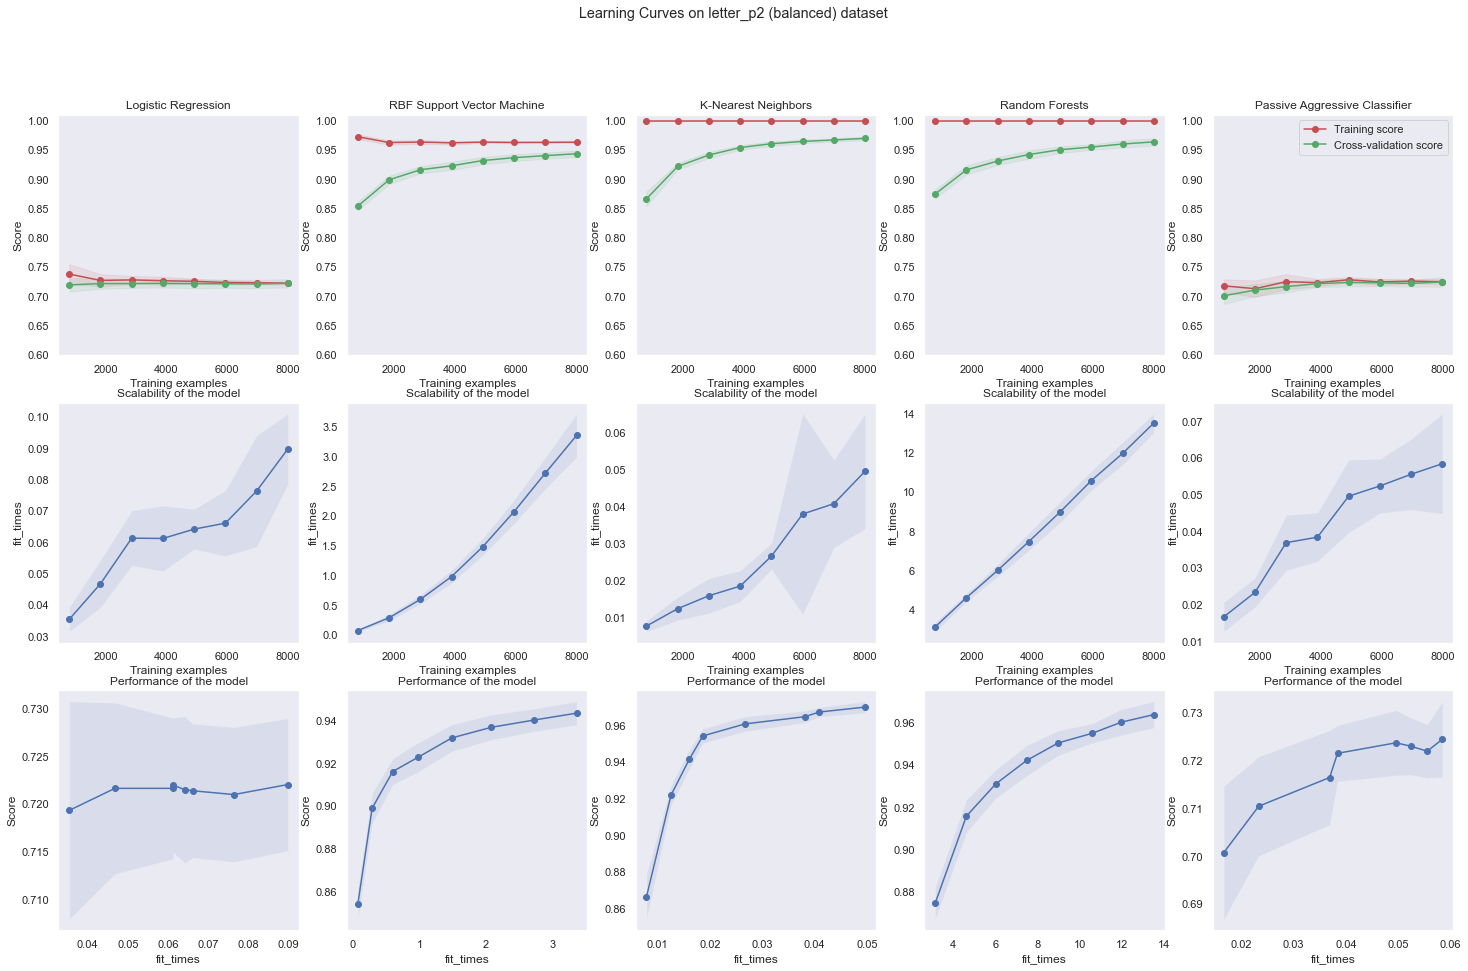

Wall time: 4min 44s


In [409]:
%%time

# credit to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html 
# for original framework
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 8), legend = False):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    if legend == True:
        axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 5, figsize=(25, 15))

X, y,_, _ = draw_samples(letter_df_p2, n = 10000)

title = "Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression(solver='saga', random_state=0, C=10, penalty='l2')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"K-Nearest Neighbors"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator =  KNeighborsClassifier(algorithm='ball_tree',
                                  leaf_size=50, 
                                  n_neighbors = 2,
                                  weights = 'distance')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"RBF Support Vector Machine"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(random_state=0, C = 100, gamma=1, kernel='rbf')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"Random Forests"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state=0, max_features = 4,
                              n_estimators = 1024)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

title = r"Passive Aggressive Classifier"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = PassiveAggressiveClassifier(max_iter=5000, random_state=0, tol=1e-3,
                                   C = 0.01, loss = 'hinge')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4, legend = True)

plt.suptitle('Learning Curves on letter_p2 (balanced) dataset')
reallysave = False
if reallysave == True:
    plt.savefig('learning_curve_analysis.png')
plt.show()


### Perform validation score analysis

In [212]:
dfcv = big_dataframe[~big_dataframe['cvscores'].isnull()].drop(columns=['gridcvs', 'best_algos', 'stats', 'is_train'])

datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']
eee = []
for i in datasets:
    for j in algorithms:
        templist = dfcv[(dfcv['dataset'] == i) & (dfcv['algorithm'] == j)]['cvscores'].tolist()
        lislis = sum(templist, [])
        [eee.append([i,j, k]) for k in lislis]

mergecvs = pd.DataFrame(eee, columns = ['dataset', 'algorithm', 'accs'])

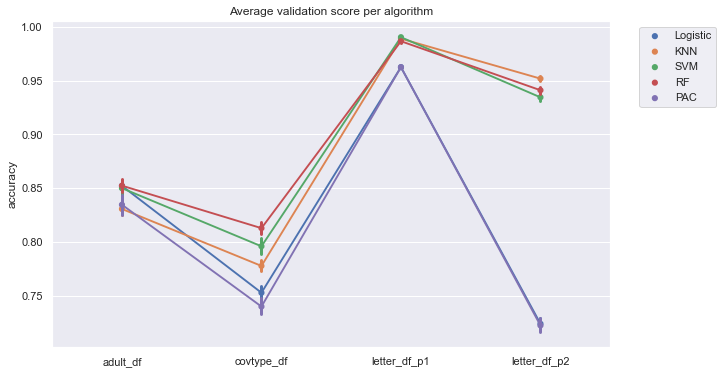

In [213]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.pointplot('dataset', 'accs', hue='algorithm',
    data=mergecvs, dodge=False, join=True, errwidth=3,
             scale=.7)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Average validation score per algorithm')
plt.ylabel('accuracy')
plt.xlabel('');
plt.savefig('validation_score.png',bbox_inches='tight')


<br>

### Produce LaTeX tables 

In [339]:
big_dataframe[big_dataframe['algorithm'] == 'KNN']['stats'][8]

[{'accuracy_score': 1.0, 'matthews_corrcoef': 1.0, 'f1_score': 1.0},
 {'accuracy_score': 0.8285620986176119,
  'matthews_corrcoef': 0.5106297801515467,
  'f1_score': 0.6178112108711479}]

In [410]:
# table of scores per metric

dfmetric = big_dataframe[~big_dataframe['stats'].isnull()].drop(columns=['gridcvs', 'best_algos', 'cvscores'])
dfmetric = dfmetric[dfmetric['is_train'] == False].drop(columns = ['is_train'])


datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']
eee = []
for i in datasets:
    for j in algorithms:
        templist = dfmetric[(dfmetric['dataset'] == i) & (dfmetric['algorithm'] == j)]['stats'].tolist()
        
        eee.append(sum([[i], [j], np.mean([list(templist[i][0].values()) for i in range(3)], axis=0).tolist(), [True]], []))
        eee.append(sum([[i], [j], np.mean([list(templist[i][1].values()) for i in range(3)], axis=0).tolist(), [False]], []))


mergescores = pd.DataFrame(eee, columns = ['dataset', 'algorithm', 
                                           'accuracy_score', 'f1_score', 'matthews_corrcoef',
                                           'isTrain'])

In [426]:
testscores['accuracy_score'].mean(), testscores['f1_score'].mean(), testscores['matthews_corrcoef'].mean()

(0.8659764154940953, 0.5885368285182292, 0.700949680334696)

In [411]:
testscores = mergescores[mergescores['isTrain'] == False].drop(columns='isTrain')
testscores['mean'] = testscores.apply(lambda row: (row['accuracy_score'] + row['f1_score']  + row['matthews_corrcoef'])/3, axis = 1)
print(testscores.to_latex(index = False))

\begin{tabular}{llrrrr}
\toprule
      dataset & algorithm &  accuracy\_score &  f1\_score &  matthews\_corrcoef &      mean \\
\midrule
     adult\_df &  Logistic &        0.848397 &  0.562177 &           0.652493 &  0.687689 \\
     adult\_df &       KNN &        0.828598 &  0.507330 &           0.612841 &  0.649590 \\
     adult\_df &       SVM &        0.845881 &  0.554756 &           0.646761 &  0.682466 \\
     adult\_df &        RF &        0.850707 &  0.573323 &           0.665464 &  0.696498 \\
     adult\_df &       PAC &        0.839665 &  0.527269 &           0.611723 &  0.659552 \\
   covtype\_df &  Logistic &        0.752906 &  0.506414 &           0.751371 &  0.670230 \\
   covtype\_df &       KNN &        0.792618 &  0.585539 &           0.790082 &  0.722746 \\
   covtype\_df &       SVM &        0.801670 &  0.604126 &           0.800954 &  0.735583 \\
   covtype\_df &        RF &        0.821872 &  0.644257 &           0.820572 &  0.762233 \\
   covtype\_df &       PAC

In [787]:
main_result = testscores.groupby('algorithm').mean().drop(columns='trialNum')
main_result['mean'] = main_result.mean(axis=1)
print(main_result.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  accuracy\_score &  f1\_score &  matthews\_corrcoef &  accuracy\_score\_normed &  f1\_score\_normed &  matthews\_corrcoef\_normed &      mean \\
algorithm &                 &           &                    &                        &                  &                           &           \\
\midrule
KNN       &        0.892165 &  0.722254 &           0.811693 &               0.814810 &         0.579543 &                  0.698198 &  0.753111 \\
Logistic  &        0.823015 &  0.381284 &           0.533603 &               0.749136 &         0.267399 &                  0.438335 &  0.532129 \\
PAC       &        0.816864 &  0.369064 &           0.522613 &               0.744076 &         0.260511 &                  0.430662 &  0.523965 \\
RF        &        0.901856 &  0.734452 &           0.814022 &               0.822489 &         0.581132 &                  0.696170 &  0.758354 \\
SVM       &        0.895982 &  0.735630 &           0.822817 &    

In [413]:
trainscores = mergescores[mergescores['isTrain'] == True].drop(columns='isTrain')
trainscores['mean'] = trainscores.apply(lambda row: (row['accuracy_score'] + row['f1_score']  + row['matthews_corrcoef'])/3, axis = 1)
print(trainscores.to_latex(index = False))

\begin{tabular}{llrrrr}
\toprule
      dataset & algorithm &  accuracy\_score &  f1\_score &  matthews\_corrcoef &      mean \\
\midrule
     adult\_df &  Logistic &        0.860200 &  0.593623 &           0.676292 &  0.710038 \\
     adult\_df &       KNN &        0.893000 &  0.689861 &           0.754769 &  0.779210 \\
     adult\_df &       SVM &        0.864400 &  0.606165 &           0.686092 &  0.718885 \\
     adult\_df &        RF &        1.000000 &  1.000000 &           1.000000 &  1.000000 \\
     adult\_df &       PAC &        0.846400 &  0.544156 &           0.622109 &  0.670888 \\
   covtype\_df &  Logistic &        0.756733 &  0.513796 &           0.755055 &  0.675195 \\
   covtype\_df &       KNN &        1.000000 &  1.000000 &           1.000000 &  1.000000 \\
   covtype\_df &       SVM &        0.871467 &  0.744000 &           0.871218 &  0.828895 \\
   covtype\_df &        RF &        1.000000 &  1.000000 &           1.000000 &  1.000000 \\
   covtype\_df &       PAC

In [456]:
# table of scores per metric

dfmetric = big_dataframe[~big_dataframe['stats'].isnull()].drop(columns=['gridcvs', 'best_algos', 'cvscores'])
dfmetric = dfmetric[dfmetric['is_train'] == False].drop(columns = ['is_train'])


datasets = ['adult_df', 'covtype_df', 'letter_df_p1', 'letter_df_p2']
trials = [0, 1, 2]
algorithms = ['Logistic', 'KNN', 'SVM', 'RF', 'PAC']
eee = []
for i in datasets:
    for j in algorithms:
        templist = dfmetric[(dfmetric['dataset'] == i) & (dfmetric['algorithm'] == j)]['stats'].tolist()
        
        [eee.append(sum([[i], [j], list(templist[k][1].values()), [False], [k]], [])) for k in range(3)]


mergescoresfine = pd.DataFrame(eee, columns = ['dataset', 'algorithm', 
                                           'accuracy_score', 'f1_score', 'matthews_corrcoef',
                                           'isTrain', 'trialNum'])

In [608]:
testscoresfine = mergescoresfine[mergescoresfine['isTrain'] == False].drop(columns='isTrain')
melted_scores = pd.melt(testscoresfine, id_vars=['algorithm', 'dataset', 'trialNum'])
melted_scores = pd.pivot_table(melted_scores, index='algorithm', columns=['dataset', 'trialNum', 'variable'],values='value').values

In [565]:
melted_scores_norm = MinMaxScaler().fit(melted_scores).transform(melted_scores)

t_stats = np.zeros(shape=(5,5))
p_vals = np.zeros(shape=(5,5))
for i,j in combinations(range(5),2):
    t_stats[i, j] = stats.ttest_rel(melted_scores_norm[i],melted_scores_norm[j])[0]
    p_vals[i, j] = stats.ttest_rel(melted_scores_norm[i],melted_scores_norm[j])[1]
t_stats

array([[  0.        ,   3.36583971,   6.19915139,  -4.25607378,
         -3.78149517],
       [  0.        ,   0.        ,   3.63002306, -12.59141448,
         -8.13705823],
       [  0.        ,   0.        ,   0.        , -32.67871947,
        -17.00657299],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          3.6431647 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [581]:
f1_score(letter_df_p2['pred'].values,np.ones(len(letter_df_p2)))

0.663994655978624

In [788]:
baselines = []

for i in [letter_df_p1, letter_df_p2, adult_df, covtype_df]:
    baselines.append([1 - accuracy_score(i['pred'].values, np.ones(len(i))),
                      f1_score(i['pred'].values, np.ones(len(i))),
                      matthews_corrcoef(i['pred'].values, np.ones(len(i)))])
baselines = pd.DataFrame(baselines, columns = ['accuracy_score', 'f1_score', 'matthews_corrcoef'])
baselines['dataset'] = ['letter_df_p1', 'letter_df_p2', 'adult_df', 'covtype_df']
basescores = baselines.melt(id_vars=['dataset'])

highscores = testscores.drop(columns='trialNum').melt(id_vars=['dataset'], value_vars=['accuracy_score', 'f1_score', 'matthews_corrcoef'])
highscores = highscores.groupby(['dataset', 'variable']).max().reset_index()

In [794]:
print(baselines.to_latex())
print(basescores.to_latex())
print(highscores.to_latex())

\begin{tabular}{lrrrl}
\toprule
{} &  accuracy\_score &  f1\_score &  matthews\_corrcoef &       dataset \\
\midrule
0 &        0.962350 &  0.072568 &                0.0 &  letter\_df\_p1 \\
1 &        0.503000 &  0.663995 &                0.0 &  letter\_df\_p2 \\
2 &        0.759190 &  0.388149 &                0.0 &      adult\_df \\
3 &        0.512401 &  0.655552 &                0.0 &    covtype\_df \\
\bottomrule
\end{tabular}

\begin{tabular}{lllr}
\toprule
{} &       dataset &           variable &     value \\
\midrule
0  &  letter\_df\_p1 &     accuracy\_score &  0.962350 \\
1  &  letter\_df\_p2 &     accuracy\_score &  0.503000 \\
2  &      adult\_df &     accuracy\_score &  0.759190 \\
3  &    covtype\_df &     accuracy\_score &  0.512401 \\
4  &  letter\_df\_p1 &           f1\_score &  0.072568 \\
5  &  letter\_df\_p2 &           f1\_score &  0.663995 \\
6  &      adult\_df &           f1\_score &  0.388149 \\
7  &    covtype\_df &           f1\_score &  0.655552 \\
8  &  l

In [792]:
def minmax(x, low, high):
    return (low + (high - low)) * x

for metric in ['accuracy_score','f1_score','matthews_corrcoef']:
    tempone = []
    for dataset in testscores.dataset.unique():
        tempdf = testscores[(testscores['dataset'] == dataset)][metric]
        high = highscores[(highscores['dataset'] == dataset) & (highscores['variable'] == metric)]['value'].values[0]
        low = basescores[(basescores['dataset'] == dataset) & (basescores['variable'] == metric)]['value'].values[0]
        tempone.append(minmax(tempdf, low, high).tolist())
    testscores[metric + '_normed'] = sum(tempone, [])
    
print(testscores.groupby(['dataset', 'algorithm']).agg(np.mean).drop(columns='trialNum').to_latex())

\begin{tabular}{llrrrrrr}
\toprule
             &     &  accuracy\_score &  f1\_score &  matthews\_corrcoef &  accuracy\_score\_normed &  f1\_score\_normed &  matthews\_corrcoef\_normed \\
dataset & algorithm &                 &           &                    &                        &                  &                           \\
\midrule
adult\_df & KNN &        0.828598 &  0.507330 &           0.612841 &               0.705937 &         0.292717 &                  0.409623 \\
             & Logistic &        0.848397 &  0.562177 &           0.652493 &               0.722804 &         0.324362 &                  0.436126 \\
             & PAC &        0.839665 &  0.527269 &           0.611723 &               0.715365 &         0.304221 &                  0.408876 \\
             & RF &        0.850707 &  0.573323 &           0.665464 &               0.724772 &         0.330793 &                  0.444796 \\
             & SVM &        0.845881 &  0.554756 &           0.646761 &    

In [609]:
[stats.ttest_rel(melted_scores[i],melted_scores.mean(axis=0))[1] for i in range(5)]

[0.0004249835498308292,
 0.00010239611721697041,
 2.3851450122922556e-05,
 1.7722062255094482e-06,
 7.630033393399838e-05]

In [795]:
from itertools import combinations
t_stats = np.zeros(shape=(5,5))
p_vals = np.zeros(shape=(5,5))
for i,j in combinations(range(5),2):
    t_stats[i, j] = stats.ttest_rel(melted_scores[i],melted_scores[j])[0]
    p_vals[i, j] = stats.ttest_rel(melted_scores[i],melted_scores[j])[1]
    
print(pd.DataFrame(t_stats).to_latex())
print(pd.DataFrame(p_vals).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.0 &  4.178346 &  4.458043 & -1.141729 & -2.485636 \\
1 &  0.0 &  0.000000 &  2.926512 & -4.862667 & -4.428268 \\
2 &  0.0 &  0.000000 &  0.000000 & -5.183160 & -4.708541 \\
3 &  0.0 &  0.000000 &  0.000000 &  0.000000 & -0.232260 \\
4 &  0.0 &  0.000000 &  0.000000 &  0.000000 &  0.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &    0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.0 &  0.000186 &  0.000081 &  0.261318 &  0.017856 \\
1 &  0.0 &  0.000000 &  0.005986 &  0.000024 &  0.000089 \\
2 &  0.0 &  0.000000 &  0.000000 &  0.000009 &  0.000039 \\
3 &  0.0 &  0.000000 &  0.000000 &  0.000000 &  0.817689 \\
4 &  0.0 &  0.000000 &  0.000000 &  0.000000 &  0.000000 \\
\bottomrule
\end{tabular}



In [796]:
melted_scores

array([[ 0.8285621 ,  0.51062978,  0.61781121,  0.82750989,  0.50104862,
         0.60554265,  0.82972316,  0.51031276,  0.61517015,  0.79164149,
         0.58421425,  0.79150503,  0.79718999,  0.59457968,  0.79469177,
         0.78902176,  0.57782335,  0.78405052,  0.9906    ,  0.86901604,
         0.87331536,  0.99293333,  0.90168835,  0.90535714,  0.99193333,
         0.88388275,  0.88659794,  0.95353333,  0.90705987,  0.95313025,
         0.9576    ,  0.91531291,  0.95778574,  0.95573333,  0.9114784 ,
         0.95535834],
       [ 0.84993288,  0.56598723,  0.65458493,  0.84644969,  0.55964769,
         0.65373916,  0.8488081 ,  0.56089467,  0.64915383,  0.75508149,
         0.51113505,  0.75519454,  0.75154163,  0.50405329,  0.75165761,
         0.75209544,  0.50405323,  0.74726103,  0.96146667, -0.00230763,
         0.        ,  0.96273333,  0.        ,  0.        ,  0.96246667,
         0.        ,  0.        ,  0.7258    ,  0.45191257,  0.72767   ,
         0.73173333,  0.46385

In [415]:
dfesase = testscores.drop(columns=['accuracy_score','f1_score','matthews_corrcoef'])

pivotedone = pd.pivot_table(dfesase, index='algorithm', columns=['dataset'],values='mean')
pivotedone['mean'] = pivotedone.mean(axis=1)
print(pivotedone.to_latex(index = True))

\begin{tabular}{lrrrrr}
\toprule
dataset &  adult\_df &  covtype\_df &  letter\_df\_p1 &  letter\_df\_p2 &      mean \\
algorithm &           &             &               &               &           \\
\midrule
KNN       &  0.649590 &    0.722746 &      0.921703 &      0.940777 &  0.808704 \\
Logistic  &  0.687689 &    0.670230 &      0.320484 &      0.638799 &  0.579301 \\
PAC       &  0.659552 &    0.658580 &      0.320756 &      0.639168 &  0.569514 \\
RF        &  0.696498 &    0.762233 &      0.879860 &      0.928515 &  0.816777 \\
SVM       &  0.682466 &    0.735583 &      0.929284 &      0.925238 &  0.818143 \\
\bottomrule
\end{tabular}



In [798]:

from itertools import combinations
t_stats = np.zeros(shape=(5,5))
p_vals = np.zeros(shape=(5,5))
for i,j in combinations(range(5),2):
    t_stats[i, j] = stats.ttest_rel(melted_scores_norm[i],melted_scores_norm[j])[0]
    p_vals[i, j] = stats.ttest_rel(melted_scores_norm[i],melted_scores_norm[j])[1]
    
print(pd.DataFrame(t_stats).to_latex())
print(pd.DataFrame(p_vals).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    0 &        1 &         2 &          3 &          4 \\
\midrule
0 &  0.0 &  3.36584 &  6.199151 &  -4.256074 &  -3.781495 \\
1 &  0.0 &  0.00000 &  3.630023 & -12.591414 &  -8.137058 \\
2 &  0.0 &  0.00000 &  0.000000 & -32.678719 & -17.006573 \\
3 &  0.0 &  0.00000 &  0.000000 &   0.000000 &   3.643165 \\
4 &  0.0 &  0.00000 &  0.000000 &   0.000000 &   0.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &    0 &         1 &             2 &             3 &             4 \\
\midrule
0 &  0.0 &  0.001864 &  4.224100e-07 &  1.479171e-04 &  5.844738e-04 \\
1 &  0.0 &  0.000000 &  8.967992e-04 &  1.479518e-14 &  1.388659e-09 \\
2 &  0.0 &  0.000000 &  0.000000e+00 &  8.132808e-28 &  1.704558e-18 \\
3 &  0.0 &  0.000000 &  0.000000e+00 &  0.000000e+00 &  8.643006e-04 \\
4 &  0.0 &  0.000000 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 \\
\bottomrule
\end{tabular}



In [285]:
_,_,X_test,Y_test = draw_samples(adult_df)
values = big_dataframe['best_algos'].iloc[2].best_estimator_.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, values))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     20891
           1       0.74      0.59      0.66      6670

    accuracy                           0.85     27561
   macro avg       0.81      0.76      0.78     27561
weighted avg       0.84      0.85      0.84     27561



<br><br>

### Description of problem LaTeX table

In [ ]:
adult_df = pd.read_csv("adult.txt")
covtype_df = pd.read_csv("covtype.txt",names=list(range(0,55)))
letter_df = pd.read_csv("letter-recognition.txt",names=list(range(0,17))) 
#census_df = pd.read_csv("census-income.txt",names=list(range(0,42)))

In [677]:
adult = ['ADULT', '14/105', '5000', 32561-5000, adult_df['pred'].mean()]
covtype = ['COV_TYPE', '54', '5000', 581012-5000, covtype_df['pred'].mean()]
letter_p1 = ['LETTER.p1', '15', '5000', 20000-5000, letter_df_p1['pred'].mean()]
letter_p2 = ['LETTER.p2', '15', '5000', 20000-5000, letter_df_p2['pred'].mean()]
description = pd.DataFrame([adult, covtype, letter_p1, letter_p2], 
             columns = ['PROBLEM','#ATTR', 'TRAIN SIZE', 'TEST SIZE', '%POZ'])
print(description.to_latex(index=False))

\begin{tabular}{lllrr}
\toprule
   PROBLEM &   \#ATTR & TRAIN SIZE &  TEST SIZE &      \%POZ \\
\midrule
     ADULT &  14/105 &       5000 &      27561 &  0.240810 \\
  COV\_TYPE &      54 &       5000 &     576012 &  0.487599 \\
 LETTER.p1 &      15 &       5000 &      15000 &  0.037650 \\
 LETTER.p2 &      15 &       5000 &      15000 &  0.497000 \\
\bottomrule
\end{tabular}

